<a href="https://colab.research.google.com/github/Eserhimas/Basics/blob/main/ML_Basics_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install graphviz
!pip install pydotplus 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 


In [8]:
url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
# load dataset
pima = pd.read_csv(url)

pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
features = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', "DiabetesPedigreeFunction"]

X = pima[features]
y = pima.Outcome

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
dtc = DecisionTreeClassifier()

dtc = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [12]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6796536796536796


In [16]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

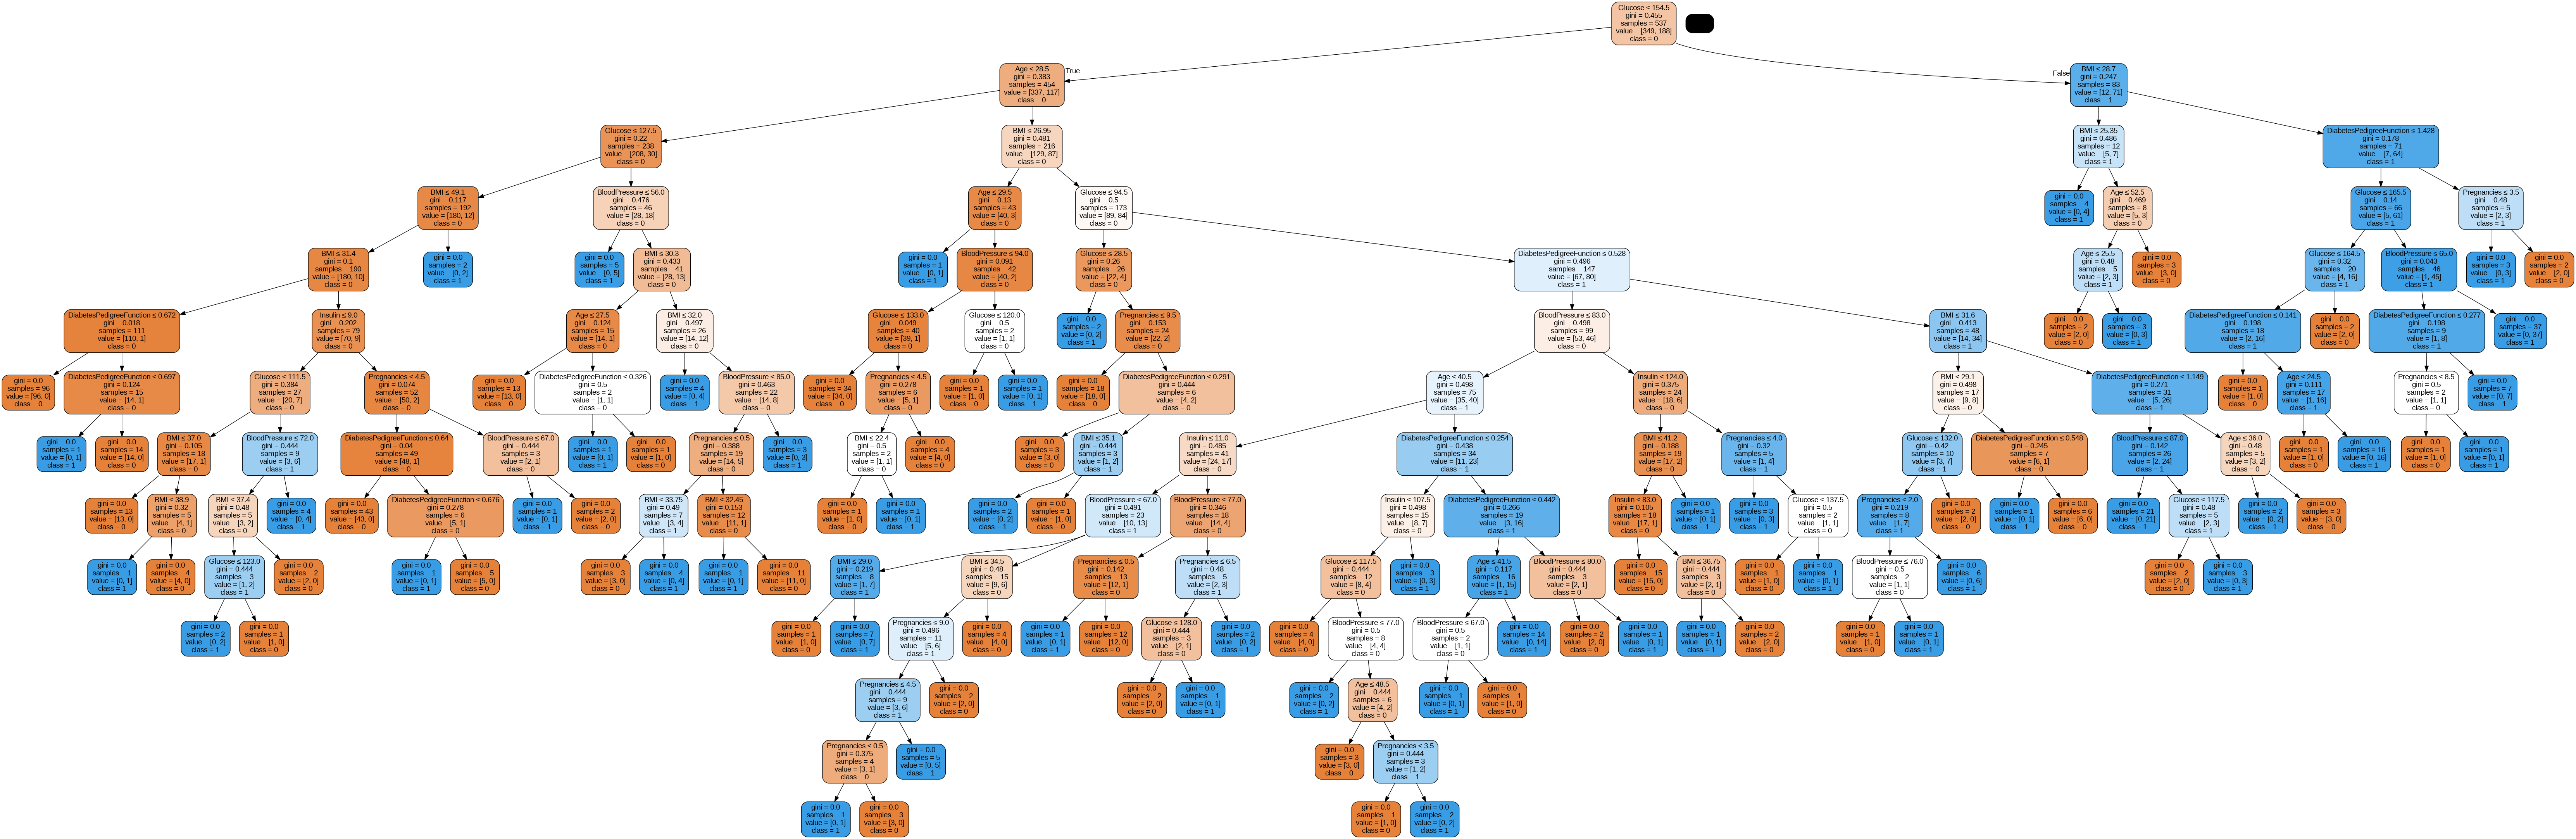

In [17]:
dot_d = StringIO()

export_graphviz(dtc, out_file=dot_d,
                filled=True, rounded=True,
                special_characters=True, feature_names =features,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_d.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [18]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7186147186147186
